In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

data = pd.read_csv('C:\\Users\\wdd45\\OneDrive\\바탕 화면\\Car\\car.data')
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [8]:
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

Text(0.5, 1.0, 'Label')

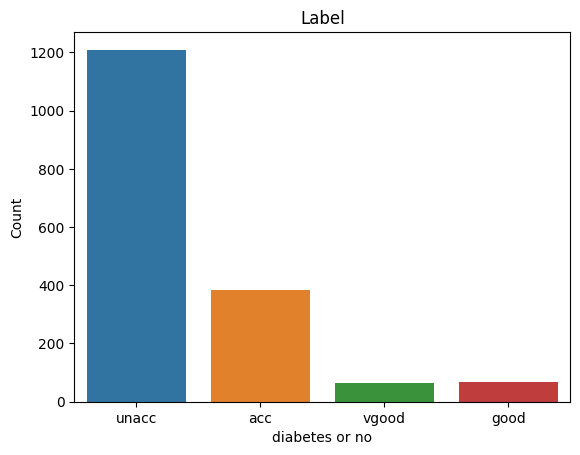

In [10]:
sns.countplot(data = data, x="unacc")
plt.xlabel("diabetes or no")
plt.ylabel("Count")
plt.title("Label")

In [61]:
X = data.iloc[:,0:7].values
y = data.iloc[:,5].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in data.columns:

    data[i]=le.fit_transform(data[i])

In [62]:
X

array([[3, 3, 0, ..., 2, 2, 2],
       [3, 3, 0, ..., 2, 0, 2],
       [3, 3, 0, ..., 1, 1, 2],
       ...,
       [1, 1, 3, ..., 0, 1, 2],
       [1, 1, 3, ..., 0, 2, 1],
       [1, 1, 3, ..., 0, 0, 3]], dtype=int64)

In [63]:
Y

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]], dtype=uint8)

In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(6,input_shape=(7,),activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 6)                 48        
                                                                 
 dense_53 (Dense)            (None, 3)                 21        
                                                                 
 dense_54 (Dense)            (None, 3)                 12        
                                                                 
 dense_55 (Dense)            (None, 2)                 8         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [65]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)


In [66]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(7,input_shape=(7,),activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='sigmoid'))

model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 7)                 56        
                                                                 
 dense_57 (Dense)            (None, 3)                 24        
                                                                 
 dense_58 (Dense)            (None, 3)                 12        
                                                                 
 dense_59 (Dense)            (None, 3)                 12        
                                                                 
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
42/44 [===========================>..] - ETA: 0s - loss: 0.5259 - accuracy: 0.5513WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000025D56F42948> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`)

44/44 [==============================] - 0s 3ms/step - loss: 7.8125e-04 - accuracy: 1.0000 - val_loss: 8.8077e-04 - val_accuracy: 1.0000
Epoch 46/100
44/44 [==============================] - 0s 4ms/step - loss: 7.4938e-04 - accuracy: 1.0000 - val_loss: 8.4583e-04 - val_accuracy: 1.0000
Epoch 47/100
44/44 [==============================] - 0s 3ms/step - loss: 7.1956e-04 - accuracy: 1.0000 - val_loss: 8.1235e-04 - val_accuracy: 1.0000
Epoch 48/100
44/44 [==============================] - 0s 3ms/step - loss: 6.9161e-04 - accuracy: 1.0000 - val_loss: 7.8049e-04 - val_accuracy: 1.0000
Epoch 49/100
44/44 [==============================] - 0s 3ms/step - loss: 6.6472e-04 - accuracy: 1.0000 - val_loss: 7.5040e-04 - val_accuracy: 1.0000
Epoch 50/100
44/44 [==============================] - 0s 3ms/step - loss: 6.3929e-04 - accuracy: 1.0000 - val_loss: 7.2183e-04 - val_accuracy: 1.0000
Epoch 51/100
44/44 [==============================] - 0s 3ms/step - loss: 6.1530e-04 - accuracy: 1.0000 - val_los

Epoch 100/100
44/44 [==============================] - 0s 3ms/step - loss: 1.3608e-04 - accuracy: 1.0000 - val_loss: 1.5468e-04 - val_accuracy: 1.0000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 0s 2ms/step


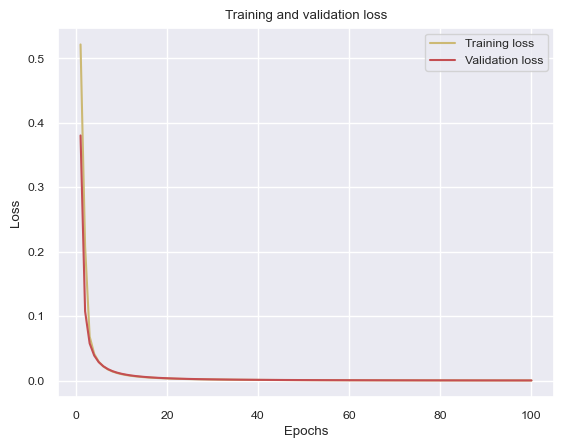

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

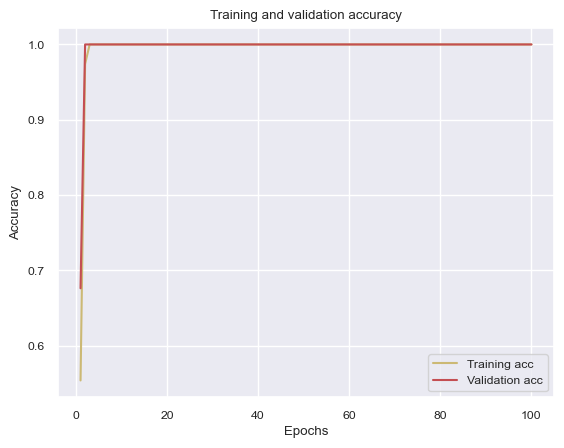

In [69]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()